In [ ]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

# Pendulum OpenAI gym environment is created for continuous control tasks.

Pendulum-v0
https://github.com/openai/gym/wiki/Pendulum-v0
    
The problem  is to  keep a frictionless pendulum standing up.

Action :
Box(1) -> Joint Effort between -2.0 and 2.0

Starting state :
Random angle from −π to π, and random velocity between -1 and 1

Reward :
Reward = -(theta^2 + 0.1\*theta_dt^2 + 0.001\*action^2)

Reward is based on the angle of the pendulum (1), the angular velocity (2) of the pendulum, 
and the force applied (3).
Agents get increased reward for keeping the pendulum (1) upright, (2) still, and (3) using little force.

Theta is normalized between -pi and pi

Therefore, the lowest reward is -(pi^2 + 0.1\*8^2 + 0.001\*2^2) = -16.2736044, 
and the highest reward is 0. 
In essence, the goal is to remain at zero angle (vertical), 
with the least rotational velocity, and the least effort.


Episode Termination :
<br>
There is no specified termination into pendulum code.
<br>
But, Pendulum is wrapped by the TimeLimit wrapper when you call gym.make.
<br>
https://github.com/openai/gym/blob/master/gym/wrappers/time_limit.py
<br>
And step function returns true for done after 200 steps !
<br>
https://github.com/openai/gym/issues/1437
    

In [2]:
import gym
import numpy as np

In [3]:
env = gym.make('Pendulum-v0')
env.reset()

array([-0.56233769, -0.82690769,  0.02425304])

In [9]:
print("action space = {}".format(env.action_space))
# Box(-2.0, 2.0, (1,), float32)
# 1 float value between -2.0 and 2.0
# Action = between -2.0 and 2.0
print("action space low = {}, high = {}".format(env.action_space.low,env.action_space.high))

print("observation space = {}".format(env.observation_space))
# Box(-8.0, 8.0, (3,), float32)
# 3 float values between -8.0 and 8.0
# Observation/State = [cos(theta), sin(theta), theta dot]
# index 0 -> cos(theta) [-1.0, 1.0] 
# index 1 -> sin(theta) [-1.0, 1.0]
# index 2 -> theta dot [-8.0, 8.0]
# The angles(thetas) are passed through the sin() and cos() function so that the observations are in the range [-1,1]. 
# This fixed range of [-1,1] helps in stabilising the training in the neural networks

print("----- Shapes --------------------")
print("observation shape = {}".format(env.observation_space.shape))
print("action shape = {}".format(env.action_space.shape))
print("-----------------------------------")

observation = env.reset()
print("observation = {}".format(observation))
print("internal state = {}".format(env.state)) # env state is a numpy array [theta, theta_dot]
print("theta={}, cos(theta)={}, sin(theta)={}, theta dot={}".format(env.state[0],np.cos(env.state[0]), np.sin(env.state[0]), env.state[1]))

action space = Box(-2.0, 2.0, (1,), float32)
action space low = [-2.], high = [2.]
observation space = Box(-8.0, 8.0, (3,), float32)
----- Shapes --------------------
observation shape = (3,)
action shape = (1,)
-----------------------------------
observation = [-0.03864939  0.99925283 -0.05990557]
internal state = [ 1.60945535 -0.05990557]
theta=1.609455345951143, cos(theta)=-0.03864939043110492, sin(theta)=0.9992528331805239, theta dot=-0.05990557308194777


In [60]:
from tqdm import tqdm

for i in range(3):
    # Randomly sample an element of this space => Joint Effort between -2.0 and 2.0
    an_action = env.action_space.sample()
    print("------------------------------------------------")
    print("a sample of action = {}".format(an_action))
    
    # launch this action to the environnement
    observation = env.step(env.action_space.sample())
    # observation = (state = [cos(theta), sin(theta), theta dot] , reward, done, info)
    
    print("[{}] observation = {}".format(i,observation))
    print("[{}] reward = {}".format(i,observation[1]))
    print("[{}] internal state = {}".format(i,env.state)) # env state is a numpy array [theta, theta_dot]
    print("[{}] theta={}, cos(theta)={}, sin(theta)={}, theta dot={}".format(i,env.state[0],np.cos(env.state[0]), np.sin(env.state[0]), env.state[1]))
    
    #env.render()

env.close()

------------------------------------------------
a sample of action = [1.9053117]
[0] observation = (array([ 0.269139  , -0.96310134,  3.22683385]), -3.8767875197819475, False, {})
[0] reward = -3.8767875197819475
[0] internal state = [4.98488791 3.22683385]
[0] theta=4.984887913902413, cos(theta)=0.26913900075426017, sin(theta)=-0.9631013437188208, theta dot=3.2268338527071965
------------------------------------------------
a sample of action = [-0.96451586]
[1] observation = (array([ 0.39046094, -0.92061949,  2.57266584]), -2.7270282599170983, False, {})
[1] reward = -2.7270282599170983
[1] internal state = [5.11352121 2.57266584]
[1] theta=5.113521206034687, cos(theta)=0.3904609413640018, sin(theta)=-0.920619494291283, theta dot=2.5726658426454745
------------------------------------------------
a sample of action = [1.980811]
[2] observation = (array([ 0.46845268, -0.88348859,  1.72812736]), -2.0310301191046327, False, {})
[2] reward = -2.0310301191046327
[2] internal state = [5.1

<h1>Why DDPG (Deep Deterministic Policy Gradient) ?</h1>
<br>

Deep Q-Learning can deal well with high-dimensional state space (images as an input) 
but still it cannot deal with high dimensional action spaces (continuous action).

DDPG is for dealing with continuous, hence high-dimensional, action spaces.

- DDPG used an actor-critic architecture than combine Q-network and policy network.
- DDPG is an off-policy algorithm.
- DDPG can only be used for environments with continuous action spaces.
- DDPG can be thought of as being deep Q-learning for continuous action spaces.

<h3>The policy structure is known as the actor</h3>, because it is used to select actions. 
<h3>The estimated value function is known as the critic</h3>, because it criticizes 
the actions made by the actor.

The policy is basically the agent behavior, a mapping from state to action 
(in case of deterministic policy) or a distribution of actions (in case of stochastic policy).
The output of the policy network is a value that corresponds to the action to be taken on the environment.

The critic is a state-value function. After each action selection, the critic evaluates the new state to determine whether things have gone better or worse than expected


Actor takes state as input to give action as output, while critic takes both state and action as input to give as output the value of the Q function. 
<br>
The critic uses gradient temporal-difference learning while the actor parameters are learned following policy gradient theorem. 
<br>
The main idea behind this architecture is that the policy network acts producing an action and the Q-network criticize that action.
<br>
https://spinningup.openai.com/en/latest/algorithms/ddpg.html
https://github.com/openai/spinningup.git

In [ ]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb

# When we deal with high-dimensional state space or action spaces 
# we have to introduce complex and non-linear function approximators 
# such as deep neural networks

# On-policy or off-policy ?

What actually policy (denoted by π) means ?
Policy specifies an action a, that is taken in a state s (or more precisely, π is a probability, that an action a is taken in a state s).

What types of learning do we have?
1. Evaluate Q(s,a) function: predict sum of future discounted rewards, where a is an action and s is a state.
2. Find π (actually, π(a|s)), that yields to a maximum reward.

On-policy and off-policy learning is only related to the first task: evaluating Q(s,a).

The difference is this:<br>
- In on-policy learning, the Q(s,a) function is learned from actions that we took using our current policy π(a|s).
<br>The update function for the on-policy SARSA algorithm: Q(s,a)←Q(s,a)+α(r+γQ(s′,a′)−Q(s,a)), 
where a′ is the action, that was taken according to policy π.
<br>
- In off-policy learning, the Q(s,a) function is learned from taking different actions (for example, random actions). 
We even don't need a policy at all !
<br>The update function for the off-policy Q-learning algorithm: Q(s,a)←Q(s,a)+α(r+γmaxa′Q(s′,a′)−Q(s,a)), 
where a′ are all actions, that were probed in state s′.

# Pytorch version of DDPG on Pendulum environment
## based on : https://github.com/sweetice/Deep-reinforcement-learning-with-pytorch/tree/master/Char05%20DDPG

In [18]:
from itertools import count

import random
import numpy as np

import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
from tensorboardX import SummaryWriter

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device used = {}".format(device))

device used = cuda


In [20]:
# Pendulum is wrapped by the TimeLimit wrapper when you call gym.make.
# https://github.com/openai/gym/blob/master/gym/wrappers/time_limit.py
# And step function returns true for done after 200 steps ! 
env = gym.make('Pendulum-v0')
print(env)

<TimeLimit<PendulumEnv<Pendulum-v0>>>


In [21]:
seed = True
random_seed = 9527

if seed:
    env.seed(random_seed)
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)

In [22]:
state_dim = env.observation_space.shape[0]
print("state dimension = {}".format(state_dim))

action_dim = env.action_space.shape[0]
print("action dimension = {}".format(action_dim))

max_action = float(env.action_space.high[0])
print("max action value = {}".format(max_action))

state dimension = 3
action dimension = 1
max action value = 2.0


In [23]:
# min value set to tensor(1.0000e-07, device='cuda:0') if device is 'cuda'
# or tensor(1.0000e-07) if device is 'cpu'
min_Val = torch.tensor(1e-7).float().to(device) 
print("min_Val = {}".format(min_Val))

min_Val = 1.0000000116860974e-07


In [24]:
class Replay_buffer():
    '''
    Code based on:
    https://github.com/openai/baselines/blob/master/baselines/deepq/replay_buffer.py
    Expects tuples of (state, next_state, action, reward, done)
    '''
    def __init__(self, max_size=1000000):
        self.storage = []
        self.max_size = max_size
        self.ptr = 0

    # data = (state, next_state, action, reward, np.float(done))
    # state is a numpy array with 3 float values : cos(theta), sin(theta), theta_dot
    def push(self, data):
        if len(self.storage) == self.max_size:
            self.storage[int(self.ptr)] = data
            self.ptr = (self.ptr + 1) % self.max_size
        else:
            self.storage.append(data)

    def sample(self, batch_size):
        ind = np.random.randint(0, len(self.storage), size=batch_size)
        x, y, u, r, d = [], [], [], [], []

        for i in ind:
            X, Y, U, R, D = self.storage[i]
            x.append(np.array(X, copy=False)) # state  x = [ np.array([v1,v2,v3]), ..., np.array([v1,v2,v3)]) ]
            y.append(np.array(Y, copy=False)) # next_state
            u.append(np.array(U, copy=False)) # action
            r.append(np.array(R, copy=False)) # reward  r = [ np.array(v1), .... , np.array(v1) ]
            d.append(np.array(D, copy=False)) # done = [ np.array(v1), .... , np.array(v1) ]

        return np.array(x), np.array(y), np.array(u), np.array(r).reshape(-1, 1), np.array(d).reshape(-1, 1)

    
# without reshape(-1, 1 ) :
# r = [-11.5446264   ...  -1.30482835 ... -1.01760303]
# d = [0. ...  0. ... 0.]

# with reshape(-1, 1) (row dimension is unknown, column dimension is 1) :
# r = [[-11.5446264] ... [-1.30482835] ... [-1.01760303]]
# d = [[0.] ... [0.] ... [O.]]


In [25]:
# JUST TO TEST REPLAY BUFFER

capacity = 1000000
replay_buffer = Replay_buffer(capacity)

state = env.reset()
print("initial state = {}".format(state))

for _ in range(100):
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    replay_buffer.push((state, next_state, action, reward, np.float(done)))
    state = next_state
    
batch_size = 10
state_ar, next_state_ar, action_ar, reward_ar, done_ar = replay_buffer.sample(batch_size)
print("random state array = {}".format(state_ar))
print("random next state array = {}".format(next_state_ar))
print("random action array = {}".format(action_ar))
print("random reward array = {}".format(reward_ar))
print("random done array = {}".format(done_ar))


tensor_state = torch.FloatTensor(state_ar).to(device)
tensor_next_state = torch.FloatTensor(next_state_ar).to(device)
tensor_action = torch.FloatTensor(action_ar).to(device)
tensor_reward = torch.FloatTensor(reward_ar).to(device)
tensor_done = torch.FloatTensor(1-done_ar).to(device)

print("tensor state = {}".format(tensor_state))
print("tensor_next_state = {}".format(tensor_next_state))
print("tensor action = {}".format(tensor_action))
print("tensor reward = {}".format(tensor_reward))
print("tensor done = {}".format(tensor_done))


initial state = [ 0.30221246  0.95324059 -0.07186695]
random state array = [[ 0.36534169 -0.93087349  2.03197422]
 [-0.78018811  0.62554498  5.42193245]
 [-0.05663148 -0.99839515  4.05548132]
 [ 0.99724627 -0.07416122 -1.71425937]
 [ 0.79828501  0.60227987  0.34046324]
 [-0.78018811  0.62554498  5.42193245]
 [-0.46915353 -0.88311662  5.36682832]
 [ 0.99724627 -0.07416122 -1.71425937]
 [ 0.27383119  0.96177777  0.59277124]
 [-0.86879027  0.49518024  6.81574225]]
random next state array = [[ 0.4130867  -0.9106917   1.03682044]
 [-0.92346496  0.38368276  5.6409773 ]
 [ 0.114838   -0.99338423  3.43507422]
 [ 0.98753852 -0.15737751 -1.67610273]
 [ 0.77261426  0.63487574  0.82987343]
 [-0.92346496  0.38368276  5.6409773 ]
 [-0.2457427  -0.96933509  4.80092431]
 [ 0.98753852 -0.15737751 -1.67610273]
 [ 0.21489508  0.97663714  1.21579664]
 [-0.98574599  0.16824046  6.97995741]]
random action array = [[-1.9799911 ]
 [-1.6674259 ]
 [ 0.85592836]
 [ 0.6251837 ]
 [ 0.25133526]
 [-1.6674259 ]
 [ 0.

In [26]:
class Actor(nn.Module):
    # state_dim = 3, action_dim = 1, max_action = 2.0
    # state = [cos(theta), sin(theta), theta_dot]
    def __init__(self, state_dim, action_dim, max_action):
        super(Actor, self).__init__()

        self.l1 = nn.Linear(state_dim, 400) # input is state (3 float values : [cos(theta), sin(theta), theta_dot])
        self.l2 = nn.Linear(400, 300)
        self.l3 = nn.Linear(300, action_dim) # output is 1 action value

        self.max_action = max_action

    def forward(self, x):
        x = F.relu(self.l1(x)) # with relu, x has positives values
        x = F.relu(self.l2(x)) # with relu, x has positives values
        # tanh give a value between -1 and 1 (pendulum normal action is between -2.0 and 2.0).
        # max_action = 2.0
        # so forward action : tanh * max_action
        x = self.max_action * torch.tanh(self.l3(x))  
        return x


class Critic(nn.Module):
    # state_dim = 3, action_dim = 1
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()

        self.l1 = nn.Linear(state_dim + action_dim, 400) # In Critic network, input is state plus action
        self.l2 = nn.Linear(400 , 300)
        self.l3 = nn.Linear(300, 1) # the output is 1 Q Value

    # x = state, u = action
    def forward(self, x, u):
        x = F.relu(self.l1(torch.cat([x, u], 1))) # cat -> x
        x = F.relu(self.l2(x))
        x = self.l3(x) # x is the Q Value
        return x

In [12]:
# JUST TO TEST ACTOR NETWORK

# state_dim = 3, action_dim = 1, max_action = 2.0
actor = Actor(state_dim, action_dim, max_action).to(device)

# Get a state ( test with an initial state given with reset() ).
# state is a np.array (numpy array) that contains [cos(theta), sin(theta), theta dot].
# [0.9401421  0.34078266 0.65366548]
state = env.reset()
print("state = {}".format(state))

# Actor network need a tensor as input, so transform state array into a tensor,
# and take advantage of using cuda.
# tensor([0.9401, 0.3408, 0.6537], device='cuda:0')
tensor_state = torch.FloatTensor(state).to(device)
print("cuda tensor state = {}".format(tensor_state))

# But this is not enough, in fact, the input of the network need a "batch" tensor of 3 values. 
# Therefore we need to add an extra dimension using the reshape function.
# tensor([[0.9401, 0.3408, 0.6537]], device='cuda:0')
tensor_state = torch.FloatTensor(state.reshape(1, -1)).to(device)
print("cuda tensor state reshape = {}".format(tensor_state))

# Send now this "batch" tensor into the Actor network, and get the action associated.
# actor(tensor_state) is equivalent to actor.forward(tensor_state)
# action = [-0.10667577]
action = actor(tensor_state).cpu().data.numpy().flatten()
print("action = {}".format(action))

# As you can see the previous line is very complicated, 
# we are going to dissect it step by step.

# 1- send the tensor_state like this,
# this returns a "batch" tensor of actions (Only 1 in our case) using cuda.
# tensor([[-0.2250]], device='cuda:0', grad_fn=<MulBackward0>)
action = actor(tensor_state)
print("action = {}".format(action))

# 2- let's bring it back to cpu.
# tensor([[-0.1067]], grad_fn=<CopyBackwards>)
action = action.cpu()
print("action = {}".format(action))

# 3- detach() detaches the output from the computationnal graph. 
# So no gradient will be backproped along this variable.
# Or, by using old version of pytorch : action = action.data
# tensor([[-0.1067]])
action = action.detach()
print("action = {}".format(action))

# 4- convert tensor to numpy array
# [[-0.10667577]]
action = action.numpy()
print("action = {}".format(action))

# 5- "flatten" the array : return a copy of the array collapsed into one dimension.
# [-0.10667577]
action = action.flatten()
print("action = {}".format(action))


state = [0.9401421  0.34078266 0.65366548]
cuda tensor state = tensor([0.9401, 0.3408, 0.6537], device='cuda:0')
cuda tensor state reshape = tensor([[0.9401, 0.3408, 0.6537]], device='cuda:0')
action = [-0.10667577]
action = tensor([[-0.1067]], device='cuda:0', grad_fn=<MulBackward0>)
action = tensor([[-0.1067]], grad_fn=<CopyBackwards>)
action = tensor([[-0.1067]])
action = [[-0.10667577]]
action = [-0.10667577]


In [27]:
# JUST TO TEST CONCATENATION OF 2 TENSORS

# Critic network need as input a state and a action
# So, we need to concatenate the tensor state to the tensor action

tensor_state = torch.FloatTensor([[1.5, 1.6, 2.6]])
tensor_action = torch.FloatTensor([[1.21]])
print("tensor_state = {}, tensor_action = {}".format(tensor_state, tensor_action))

# concatenate tensors on the dimension 1 (column)
tensor_cat = torch.cat([tensor_state, tensor_action], 1)
print("tensor_cat = {}".format(tensor_cat))



tensor_state = tensor([[1.5000, 1.6000, 2.6000]]), tensor_action = tensor([[1.2100]])
tensor_cat = tensor([[1.5000, 1.6000, 2.6000, 1.2100]])


In [30]:
# In Reinforcement learning for discrete action spaces, 
# exploration is done via probabilistically selecting a random action 
# (such as epsilon-greedy or Boltzmann exploration). 
# For continuous action spaces, exploration is done via adding noise to the action itself.
# In the DDPG paper, the authors use Ornstein-Uhlenbeck Process to add noise to the action output 
# (Uhlenbeck & Ornstein, 1930).
# https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

# Ornstein-Ulhenbeck Process
# Taken from #https://github.com/vitchyr/rlkit/blob/master/rlkit/exploration_strategies/ou_strategy.py

class OUNoise(object):
    def __init__(self, action_space, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.3, decay_period=100000):
        self.mu           = mu
        self.theta        = theta
        self.sigma        = max_sigma
        self.max_sigma    = max_sigma
        self.min_sigma    = min_sigma
        self.decay_period = decay_period
        self.action_dim   = action_space.shape[0]
        self.low          = action_space.low
        self.high         = action_space.high
        self.reset()
        
    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
        
    def evolve_state(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(self.action_dim)
        self.state = x + dx
        return self.state
    
    def get_action(self, action, t=0):
        ou_state = self.evolve_state()
        self.sigma = self.max_sigma - (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        return np.clip(action + ou_state, self.low, self.high)

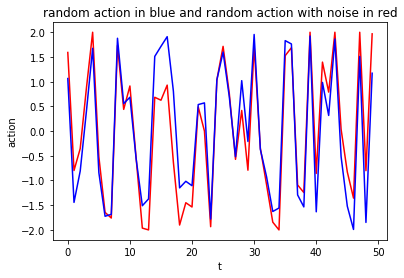

In [63]:
# JUST TO TEST Ornstein-Ulhenbeck Process

# https://ai.stackexchange.com/questions/23180/how-does-the-ornstein-uhlenbeck-process-work-and-how-it-is-used-in-ddpg
import matplotlib.pyplot as plt

action_space = env.action_space
noise = OUNoise(action_space)

time = np.arange(0, 50, 1)
actions = np.random.uniform(low=env.action_space.low, high=env.action_space.high, size=(len(time),))

actions_with_noise = np.zeros(len(actions))

for t in range(len(actions)):
    actions_with_noise[t] = noise.get_action(actions[t], t)

plt.title("random action in blue and random action with noise in red")
plt.xlabel('t')
plt.ylabel('action')
plt.plot(time,actions_with_noise,'r')
plt.plot(time,actions,'b')
plt.show()
